In [1]:
import random
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
def cv2_imshow(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(50, 50))
    return plt.imshow(a, **kwargs)

# 모델 학습

In [ ]:
!python ../tools/train.py rtmdet_l_nia.py

# 모델 추론

In [2]:
!python ../tools/test.py rtmdet_l_nia.py ../work_dirs/rtmdet_l_nia/epoch_50.pth --show-dir show_results --work-dir ../work_dirs/rtmdet_l_nia/

[DATA SPLIT] Load existing files...
01/09 13:20:16 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
01/09 13:20:16 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 1683114039
    GPU 0: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.7, V11.7.99
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel

01/09 13:20:19 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
01/09 13:20:19 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
(NORMAL      ) PipelineSwitchHoo

# 추론 결과

In [9]:
result_dir = Path('/root/mmyolo/work_dirs/rtmdet_l_nia/20240109_132016/show_results/')
file_path = list(result_dir.glob('*.png'))

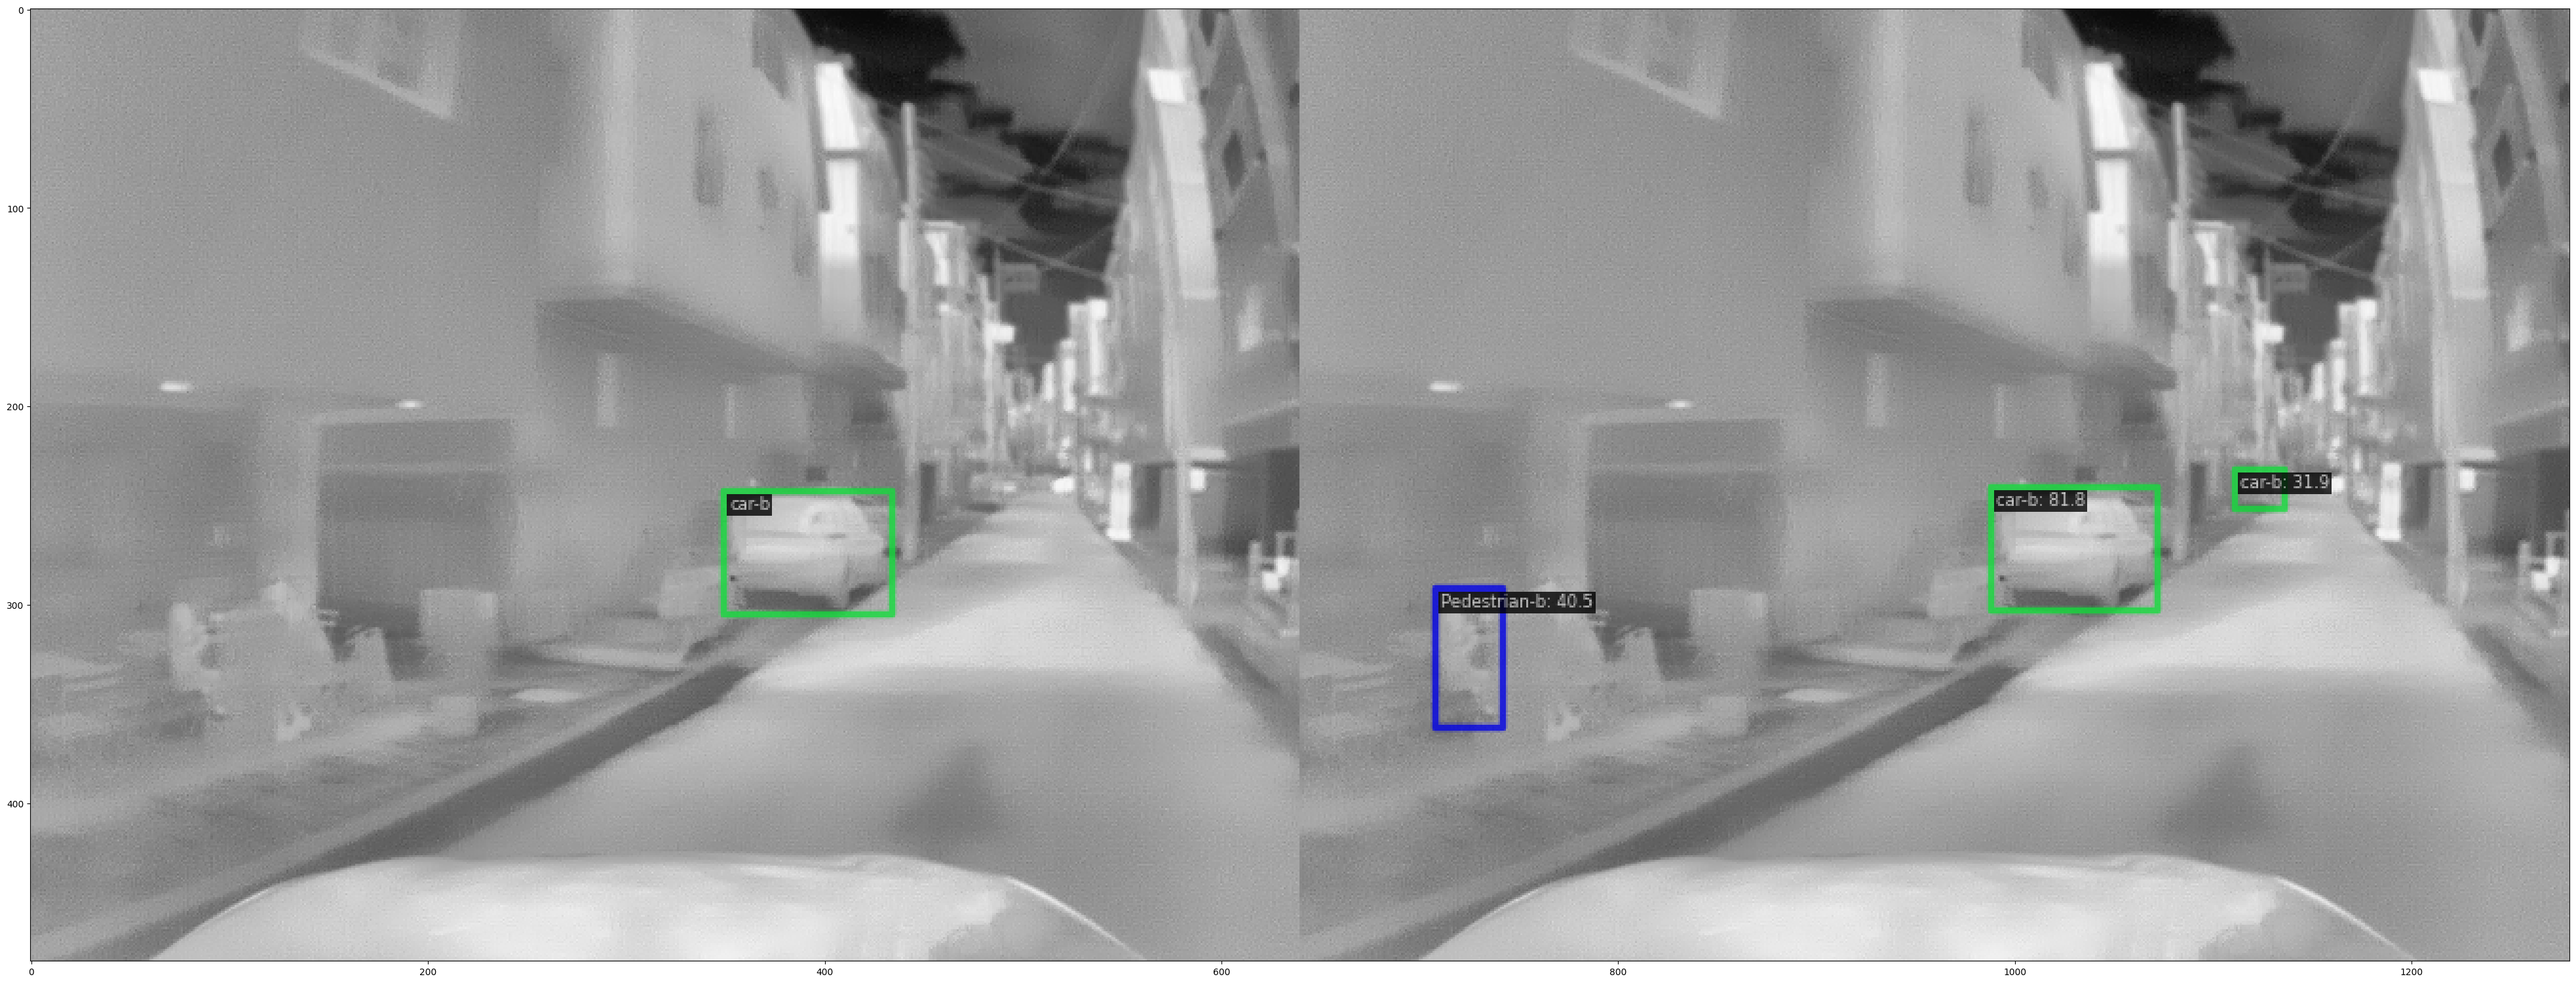

In [10]:
sample = random.sample(file_path, 1)[0]
img = cv2.imread(sample.as_posix())
cv2_imshow(img)